In [ ]:
# Importing modules 

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

In [13]:
# URL to csv file 
data_url = 'https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019'

# Importing dataset from Kaggle using pandas
spotifyhits= pd.read_csv('Spotify Hits.csv')
spotifyhits.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [16]:
spotifyhits.tail()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop
1999,Post Malone,Circles,215280,False,2019,85,0.695,0.762,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.553,120.042,hip hop


In [14]:
# Data types
spotifyhits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [51]:
spotifyhits.size

36000

# Dataset Preperation

In [23]:
# Checking to see if null values are present
# .sum() used to present a clear overview of the dataset
spotifyhits.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [33]:
# Identifying and removing possible duplicates 
spotifyhits.duplicated().sum()


59

In [42]:
# 59 songs have been identified to be duplcated
# sorting duplciated items 
spotifyhits.duplicated()
duplicants = spotifyhits[spotifyhits.duplicated(keep=False)]
duplicants = duplicants.sort_values(by=["song"], ascending=True)
display(duplicants)
#shows head & tail from the list of duplicated items 

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
930,Lady Gaga,Bad Romance,294573,True,2009,80,0.696,0.921,0,-3.755,1,0.0363,0.00314,0.000052,0.0842,0.714,119.001,pop
1002,Lady Gaga,Bad Romance,294573,True,2009,80,0.696,0.921,0,-3.755,1,0.0363,0.00314,0.000052,0.0842,0.714,119.001,pop
1984,Post Malone,Better Now,231266,True,2018,80,0.680,0.578,10,-5.804,1,0.0400,0.33100,0.000000,0.1350,0.341,145.038,hip hop
1861,Post Malone,Better Now,231266,True,2018,80,0.680,0.578,10,-5.804,1,0.0400,0.33100,0.000000,0.1350,0.341,145.038,hip hop
1832,Jax Jones,Breathe,207629,False,2017,58,0.722,0.744,11,-5.520,0,0.0363,0.02340,0.000157,0.1430,0.686,125.985,"hip hop, pop, Dance/Electronic"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Missy Elliott,Work It,263226,True,2002,70,0.884,0.677,1,-5.603,1,0.2830,0.07780,0.000000,0.0732,0.584,101.868,"hip hop, pop, R&B"
1515,DJ Snake,You Know You Like It,247266,False,2014,69,0.407,0.725,5,-5.346,0,0.1880,0.01410,0.000002,0.3060,0.247,196.093,"hip hop, pop, Dance/Electronic"
1415,DJ Snake,You Know You Like It,247266,False,2014,69,0.407,0.725,5,-5.346,0,0.1880,0.01410,0.000002,0.3060,0.247,196.093,"hip hop, pop, Dance/Electronic"
1929,Billie Eilish,lovely (with Khalid),200185,False,2018,86,0.351,0.296,4,-10.109,0,0.0333,0.93400,0.000000,0.0950,0.120,115.284,"pop, Dance/Electronic"


In [113]:
#creating a clean dataset without any duplicates or null values
spotifyhits_c = spotifyhits
spotifyhits_a = spotifyhits_c.drop_duplicates()
spotifyhits_a.shape


(1941, 18)

In [ ]:
# indicated above (1941, 18) shows that 59 items have been removed from 2000

In [114]:
# The use of np.max/min helps to identify the range of values from each column
np.max(spotifyhits_a, axis=0)

artist                    will.i.am
song                Échame La Culpa
duration_ms                  484146
explicit                       True
year                           2020
popularity                       89
danceability                  0.975
energy                        0.999
key                              11
loudness                     -0.276
mode                              1
speechiness                   0.576
acousticness                  0.976
instrumentalness              0.985
liveness                      0.853
valence                       0.973
tempo                       210.851
genre                         set()
dtype: object

In [115]:
np.min(spotifyhits_a, axis=0)

artist                              *NSYNC
song                #SELFIE - Original Mix
duration_ms                         113000
explicit                             False
year                                  1998
popularity                               0
danceability                         0.129
energy                              0.0549
key                                      0
loudness                           -20.514
mode                                     0
speechiness                         0.0232
acousticness                      0.000019
instrumentalness                       0.0
liveness                            0.0215
valence                             0.0381
tempo                               60.019
genre                     Dance/Electronic
dtype: object

In [116]:
# the dataset was supossed to only obtain songs from 2000-2019
# to stay true to the dataset the items falling in the year column outside of 2000-2019 would need to be dropped
spotifyhits_a.year.unique()

array([2000, 1999, 2001, 2011, 2002, 2016, 1998, 2018, 2004, 2010, 2015,
       2006, 2008, 2019, 2003, 2013, 2005, 2012, 2020, 2007, 2009, 2017,
       2014], dtype=int64)

In [125]:
spotifyhits_drop_years = spotifyhits_a.loc[spotifyhits_c['year'].isin([1998, 1999, 2020])].index
spotifyhits_drop_years.shape
                             

(42,)

In [126]:
# 42 songs that fall out of the 2000-2019 range have been identified 
# removing the incorrect values from the year column
spotifyhits_clean = spotifyhits_a.drop(spotifyhits_drop_years)

In [130]:
spotifyhits_clean.year.unique()

array([2000, 2001, 2011, 2002, 2016, 2018, 2004, 2010, 2015, 2006, 2008,
       2019, 2003, 2013, 2005, 2012, 2007, 2009, 2017, 2014], dtype=int64)

In [131]:
spotifyhits_clean.shape

(1899, 18)

In [ ]:
# if the dataset where to be expanded to show dates from later than 2019 this is how it would be imported

In [144]:
spotifyhits_a.to_csv("C:\\Users\\Ben\\Desktop\\spotify_dropped_years.csv")
# was sucsessfully added to the desktop

In [145]:
# importing the dropped data back into the dataset as if it was data containing data for 2020+ of spotify hits
spotifyhits_expanded = pd.read_csv('spotify_dropped_years.csv')
display(spotifyhits_expanded)

,Unnamed: 0,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1937,1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1938,1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1939,1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


In [151]:
# It matches the same value of rows as spotifyhits_a which means it was successfully added 
spotifyhits_expanded.shape

(1941, 19)

# Data Analysis

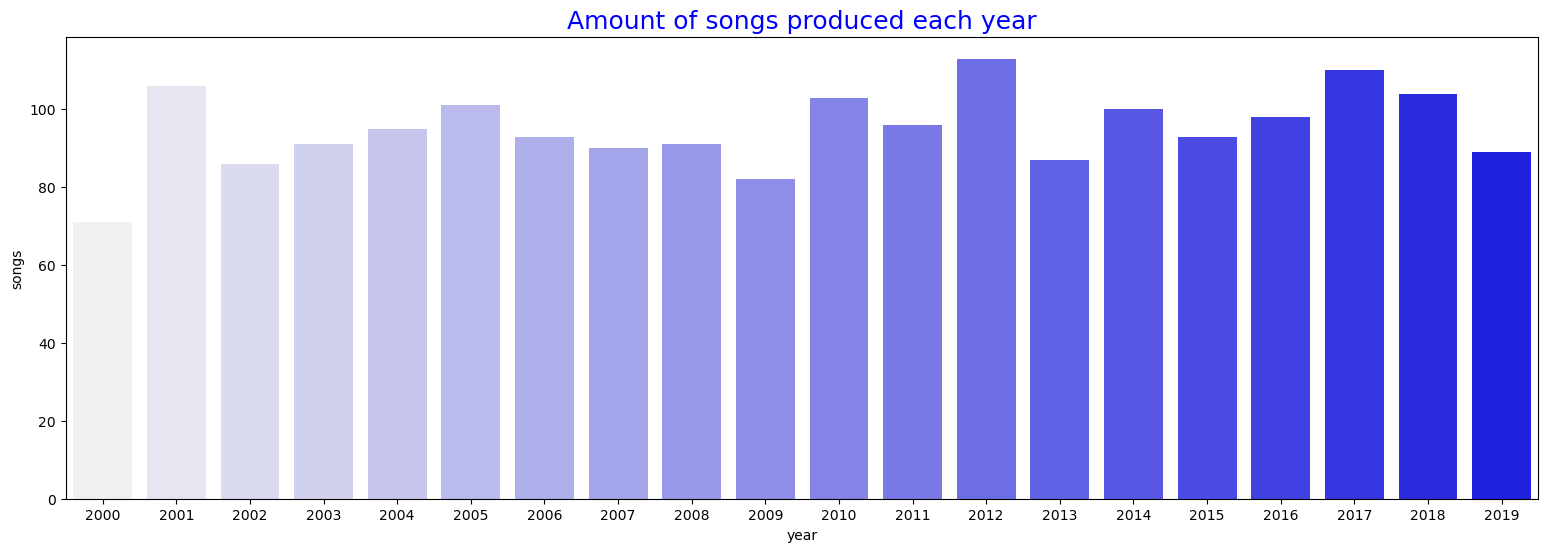

In [255]:
#songs produced each year from 2000 to 2019
songs_by_year1 = spotifyhits_clean.year.value_counts().rename_axis('year').reset_index(name='songs') 
plt.figure(figsize=(19,6))
plt.title("Amount of songs produced each year", color='blue', fontsize=18)
songsbyyear = sns.barplot(x='year', y='songs', data=songs_by_year1, palette="light:b")
plt.show()

In [254]:
spotifyhits_clean['year'].value_counts().sort_index()  #.sort_index() sorts the year column in descending order


2000     71
2001    106
2002     86
2003     91
2004     95
2005    101
2006     93
2007     90
2008     91
2009     82
2010    103
2011     96
2012    113
2013     87
2014    100
2015     93
2016     98
2017    110
2018    104
2019     89
Name: year, dtype: int64

In [211]:
# Most popular song and artist
spotifyhits_clean.sort_values(by='popularity', ascending=False)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1322,The Neighbourhood,Sweater Weather,240400,False,2013,89,0.612,0.807,10,-2.810,1,0.0336,0.04950,0.017700,0.1010,0.398,124.053,"rock, pop"
1311,Tom Odell,Another Love,244360,True,2013,88,0.445,0.537,4,-8.532,0,0.0400,0.69500,0.000017,0.0944,0.131,122.769,pop
201,Eminem,Without Me,290320,True,2002,87,0.908,0.669,7,-2.827,1,0.0738,0.00286,0.000000,0.2370,0.662,112.238,hip hop
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,hip hop
1819,Billie Eilish,lovely (with Khalid),200185,False,2018,86,0.351,0.296,4,-10.109,0,0.0333,0.93400,0.000000,0.0950,0.120,115.284,"pop, Dance/Electronic"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,Ellie Goulding,On My Mind,213445,False,2015,0,0.699,0.688,2,-6.607,0,0.0522,0.26400,0.000004,0.0863,0.742,154.943,"pop, rock, Dance/Electronic"
1045,Trey Songz,Bottoms Up (feat. Nicki Minaj),242013,True,2010,0,0.845,0.601,1,-5.283,1,0.1610,0.02050,0.000000,0.3850,0.329,74.008,"hip hop, pop, R&B"
1589,Zedd,I Want You To Know,238800,False,2015,0,0.561,0.877,9,-2.215,0,0.0659,0.00621,0.000008,0.2800,0.375,130.003,"hip hop, pop, Dance/Electronic"
1591,BØRNS,Electric Love,218173,False,2015,0,0.373,0.858,6,-6.536,0,0.0889,0.00407,0.001600,0.2560,0.605,120.063,"rock, pop"


In [332]:
#how many aritsits are there 
len(spotifyhits_clean.artist.unique())

819

<AxesSubplot:>

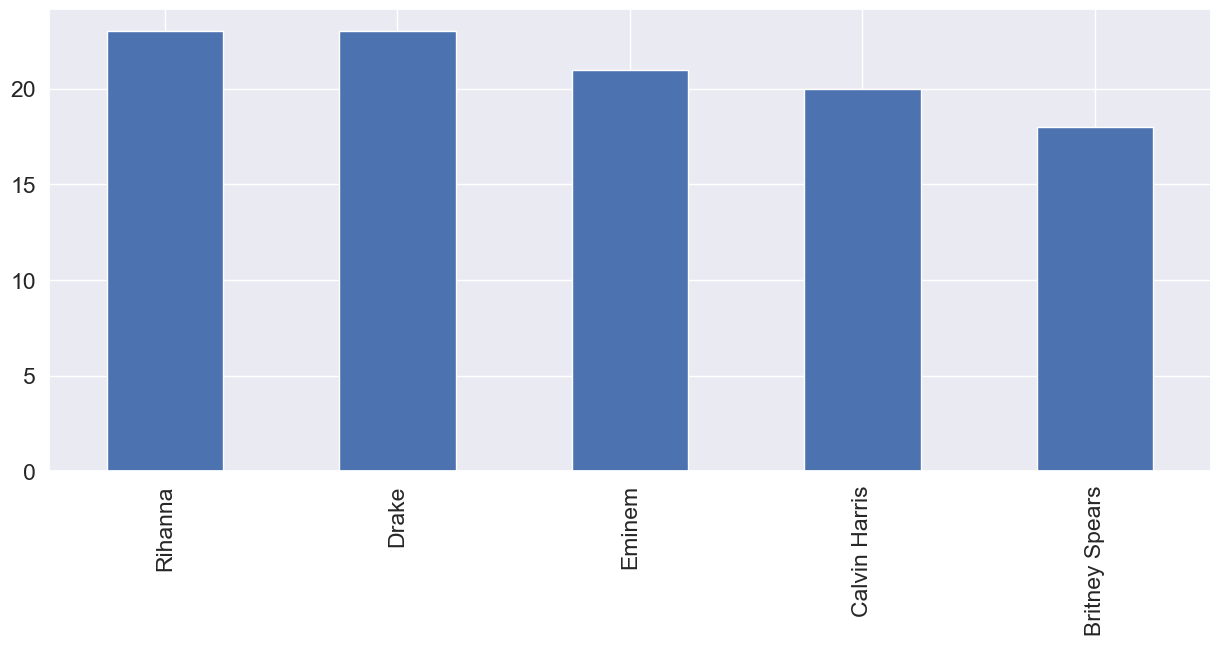

In [347]:
plt.figure(figsize=(15,6))
spotifyhits_clean.artist.value_counts().head().plot.bar()

# Drake

In [350]:
drake_spotify = spotifyhits_clean[spotifyhits_clean['artist']=='Drake']
drake_spotify.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
954,Drake,Forever,357706,True,2009,73,0.457,0.906,5,-2.278,0,0.342,0.2490,0.000000,0.1820,0.540,104.020,"hip hop, pop, R&B"
986,Drake,Best I Ever Had,258760,True,2010,54,0.431,0.894,5,-2.673,0,0.330,0.0951,0.000000,0.1880,0.605,162.161,"hip hop, pop, R&B"
1071,Drake,Over,233560,True,2010,57,0.325,0.848,7,-5.611,1,0.279,0.0109,0.000000,0.1240,0.433,100.093,"hip hop, pop, R&B"
1081,Drake,Find Your Love,208946,False,2010,56,0.625,0.613,6,-6.005,0,0.173,0.0209,0.000000,0.0286,0.738,96.033,"hip hop, pop, R&B"
1172,Drake,Headlines,235986,True,2011,74,0.636,0.566,6,-7.160,0,0.106,0.3650,0.000353,0.0917,0.425,151.894,"hip hop, pop, R&B"


In [358]:
drake_spotify.shape

(23, 18)

# Rihanna

In [357]:
rihanna_spotify = spotifyhits_clean[spotifyhits_clean['artist']=='Rihanna']
rihanna_spotify.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
503,Rihanna,Pon de Replay,246960,False,2005,77,0.779,0.640,7,-8.415,1,0.1590,0.000155,0.000770,0.1010,0.498,99.019,"hip hop, pop, R&B"
605,Rihanna,SOS,238920,False,2006,73,0.677,0.671,7,-4.905,1,0.0361,0.004000,0.000051,0.4130,0.527,137.046,"hip hop, pop, R&B"
648,Rihanna,Unfaithful,226973,False,2006,70,0.588,0.391,0,-8.607,0,0.0334,0.839000,0.000000,0.2270,0.349,144.069,"hip hop, pop, R&B"
701,Rihanna,Umbrella,275986,False,2008,81,0.583,0.829,1,-4.603,1,0.1340,0.008640,0.000000,0.0426,0.575,174.028,"hip hop, pop, R&B"
726,Rihanna,Shut Up And Drive,212280,False,2008,69,0.735,0.826,1,-4.902,1,0.0349,0.001010,0.129000,0.1970,0.740,132.964,"hip hop, pop, R&B"


In [359]:
rihanna_spotify.shape

(23, 18)

In [377]:
rihanna_spotify.sort_values('popularity',ascending=False)
rihanna_spotify[['song','year','popularity','genre']].head()

,song,year,popularity,genre
503,Pon de Replay,2005,77,"hip hop, pop, R&B"
605,SOS,2006,73,"hip hop, pop, R&B"
648,Unfaithful,2006,70,"hip hop, pop, R&B"
701,Umbrella,2008,81,"hip hop, pop, R&B"
726,Shut Up And Drive,2008,69,"hip hop, pop, R&B"


In [378]:
drake_spotify.sort_values('popularity',ascending=False)
drake_spotify[['song','year','popularity','genre']].head()

,song,year,popularity,genre
954,Forever,2009,73,"hip hop, pop, R&B"
986,Best I Ever Had,2010,54,"hip hop, pop, R&B"
1071,Over,2010,57,"hip hop, pop, R&B"
1081,Find Your Love,2010,56,"hip hop, pop, R&B"
1172,Headlines,2011,74,"hip hop, pop, R&B"


In [365]:
max_popularity = spotifyhits_clean[spotifyhits_clean.genre == 'hip hop, pop, R&B']
max_popularity.sort_values('popularity',ascending=False).head(5)[['artist','song','year','popularity','genre']]

,artist,song,year,popularity,genre
1601,Drake,One Dance,2016,84,"hip hop, pop, R&B"
400,Usher,Yeah! (feat. Lil Jon & Ludacris),2004,81,"hip hop, pop, R&B"
1800,Drake,God's Plan,2018,81,"hip hop, pop, R&B"
701,Rihanna,Umbrella,2008,81,"hip hop, pop, R&B"
1636,Rihanna,Needed Me,2016,80,"hip hop, pop, R&B"


In [353]:
spotifyhits_clean[['artist','popularity']][(spotifyhits_clean['artist'] == 'Drake') | (spotifyhits_clean['popularity'] >= 80)]

,artist,popularity
6,Eminem,86
20,Linkin Park,83
102,Eminem,83
130,Outkast,82
201,Eminem,87
...,...,...
1960,Bad Bunny,81
1963,J. Cole,80
1975,"Tyler, The Creator",80
1988,Panic! At The Disco,80


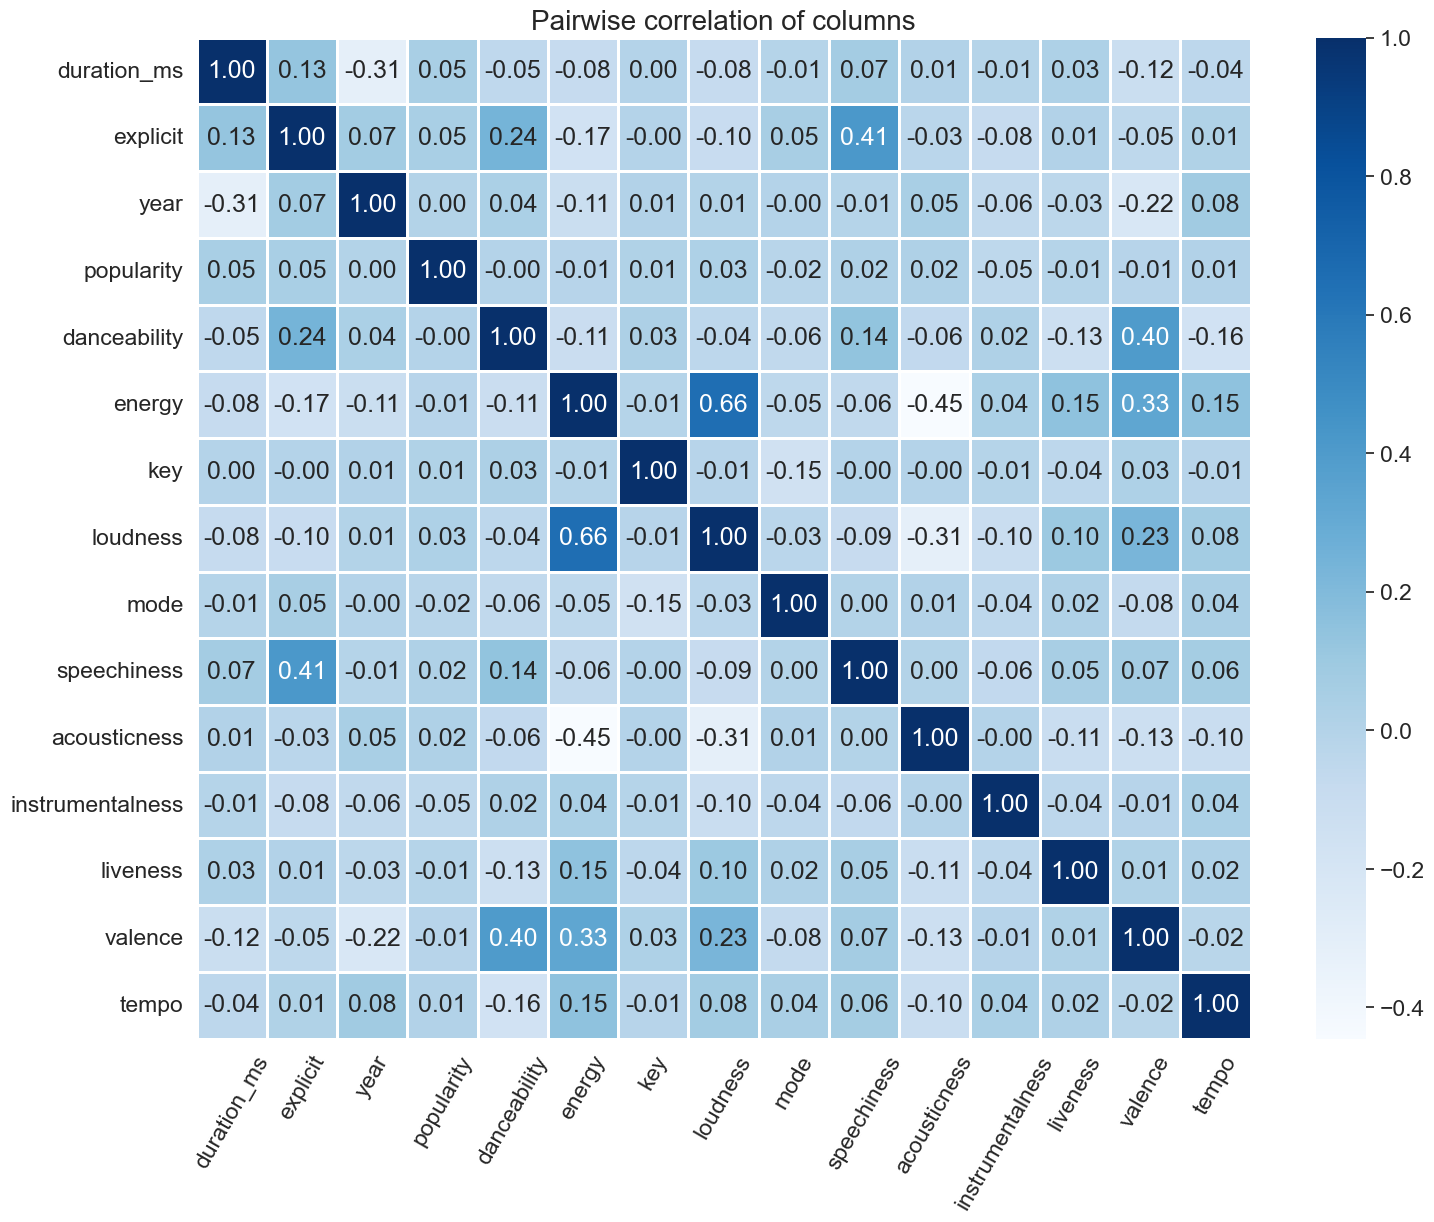

In [330]:
#pairwise correlation graph to show relashionships between two vriables 
# use this to produce visual data that shows correlation 
pairwise = spotifyhits_clean.corr()

plt.figure(figsize=(17,13))
sns.heatmap(pairwise, annot=True, fmt='.2f', linewidths=1, cmap="Blues")
plt.title('Pairwise correlation of columns', fontsize=20)
plt.xticks(rotation=60)
plt.show()

<AxesSubplot:xlabel='popularity', ylabel='duration_ms'>

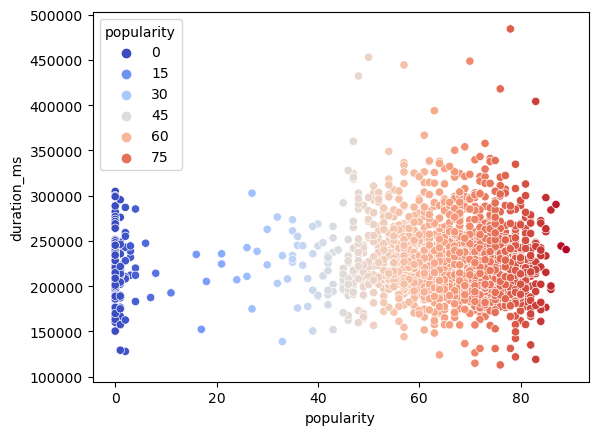

In [253]:
# relashionship between the popularity of songs by the their duration
pop_duration = sns.scatterplot(data=spotifyhits_clean, x='popularity', y='duration_ms', hue='popularity', palette= "coolwarm")
pop_duration



<AxesSubplot:xlabel='loudness', ylabel='energy'>

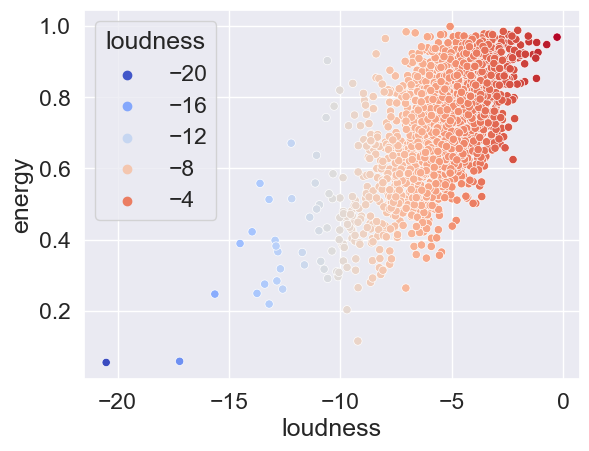

In [316]:
#scatter showing correlation between energy and loudness 
pop_duration = sns.scatterplot(data=spotifyhits_clean, x='loudness', y='energy', hue='loudness', palette= "coolwarm")
pop_duration


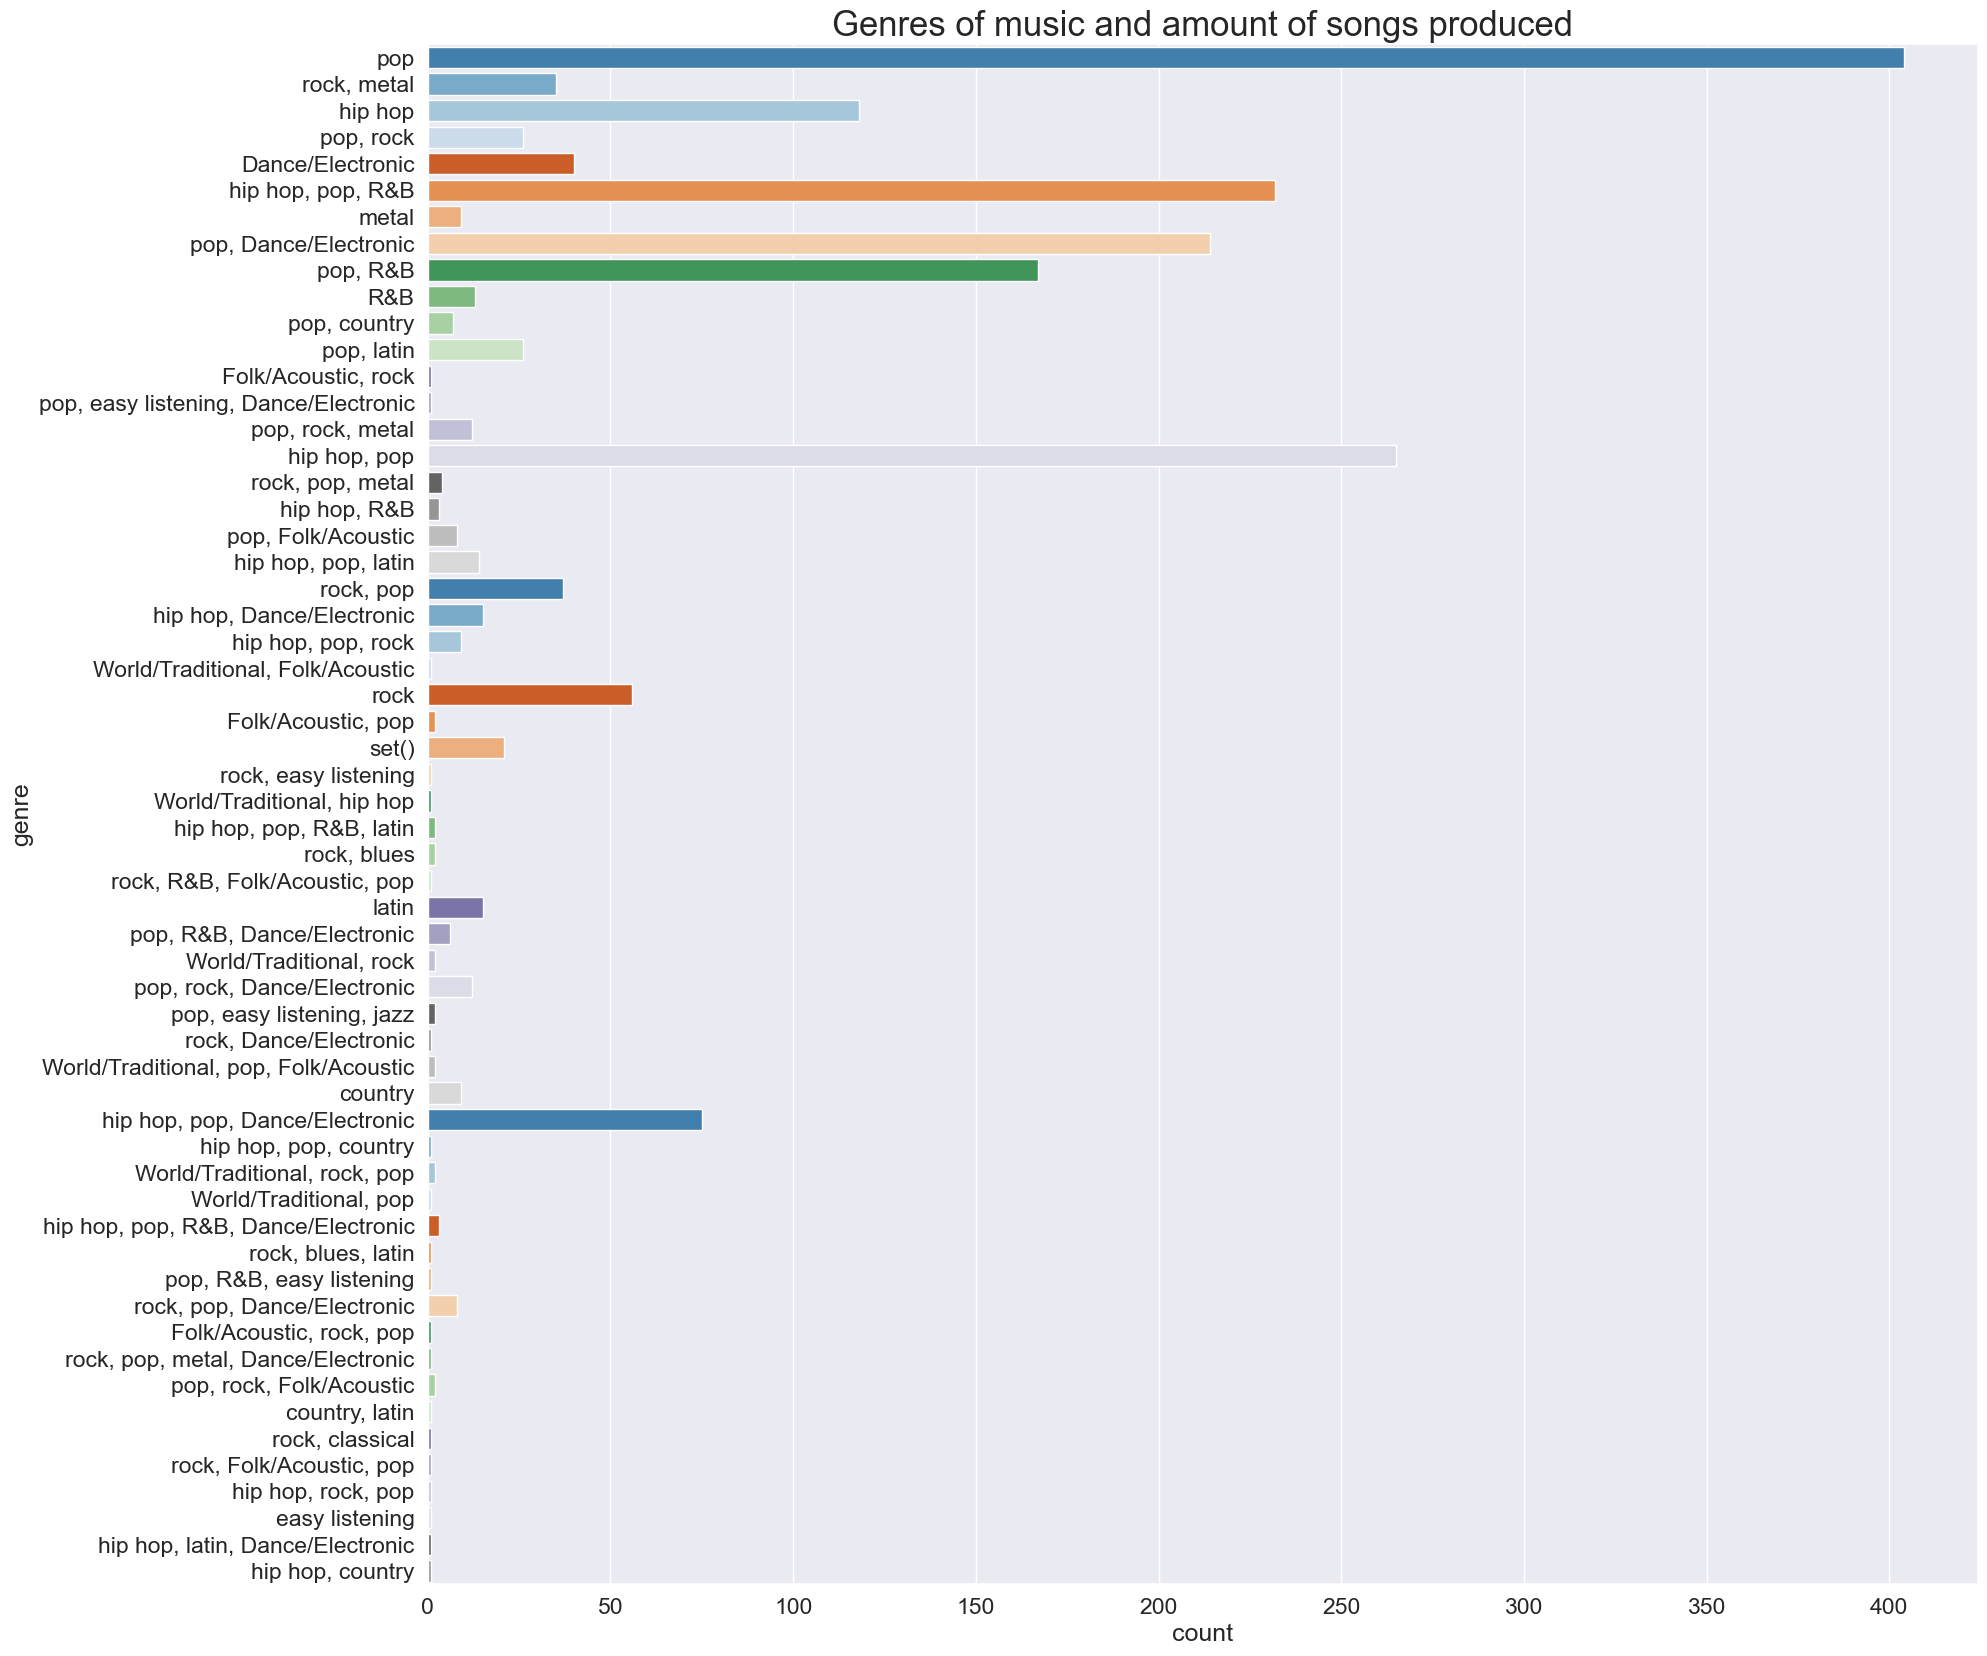

In [312]:
#Genre of music
plt.figure(figsize=(20,20))
sns.countplot(y='genre', data=spotifyhits_clean,palette="tab20c")
plt.title('Genres of music and amount of songs produced', fontsize=25)
plt.show()


Text(0.5, 1.0, 'Top 5 most popular genres of music')

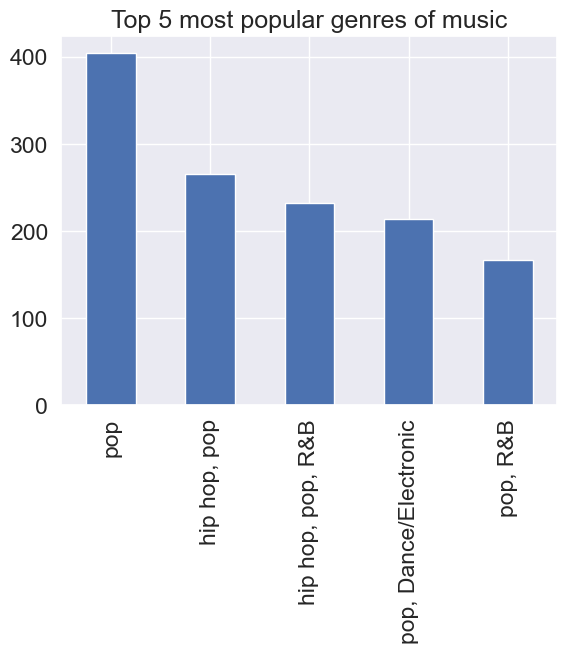

In [379]:
spotifyhits_clean.genre.value_counts().head().plot.bar()
plt.title("Top 5 most popular genres of music")

Conclusion
The data we have analysed allows us to have determine the most popular artist and genre along side the correlation between key aspects of how a song is made thus being rated by the listners mostly thorugh valence, energy, loudness which seem to be some of the most correlated aspects in the music. This is supported by the pairview correlation heatmap.